# **Segundo Parcial SIS420**
Arancibia Aguilar Daniel Andree

Ingeniería en Ciencias de la Computación

Dataset 1  https://archive.ics.uci.edu/dataset/31/covertype

Es un dataset de clasificación con 7 labels y trataremos de acercar el kmeans a ese valor

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import os
# Cálculo científico y vectorial para python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# Preprocesamiento del dataset, se asigna sin header ya que no tenian nombre las columnas

url = "/content/gdrive/MyDrive/SIS420/Segundo Parcial SIS420/Dataset1.data"
dataframe = pd.read_csv(url, header=None)
print(dataframe)

dataframe.describe()

dataframe.dropna(inplace=True)
print(dataframe.isnull().sum())

dataframe.describe()

          0    1   2    3    4     5    6    7    8     9   ...  45  46  47  \
0       2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   
1       2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   
2       2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   
3       2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   
4       2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   
...      ...  ...  ..  ...  ...   ...  ...  ...  ...   ...  ...  ..  ..  ..   
581007  2396  153  20   85   17   108  240  237  118   837  ...   0   0   0   
581008  2391  152  19   67   12    95  240  237  119   845  ...   0   0   0   
581009  2386  159  17   60    7    90  236  241  130   854  ...   0   0   0   
581010  2384  170  15   60    5    90  230  245  143   864  ...   0   0   0   
581011  2383  165  13   60    4    67  231  244  141   875  ...   0   0   0   

        48  49  50  51  52  53  54  
0        0   0

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
#Asignamos la columna que queremos eliminar
column_54 = dataframe.columns[54]

# Ahora selecciona la columna 54
y = dataframe[column_54]

# Y elimina la columna 54 del DataFrame
X = dataframe.drop(columns=[column_54])

In [ ]:
labels_ = y.unique() #Obtenemos todos los valores unicos de la columna '54'

#Mostramos la lista de valores unicos y la cantidad de estos en este caso son 7 valores unicos
print(labels_)
print(len(labels_))

[5 2 1 7 3 6 4]
7


In [ ]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#convertimos a numpy los datos de entrenamiento y prueba
X_trainNp = X_train.values
y_trainNp= y_train.values

In [ ]:
X_testNp = X_test.values
y_testNp= y_test.values

In [ ]:
#Generamos el batch size con datos seleccionados aleatoriamente de X
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]#se evita generar indices duplicados

In [ ]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans

# Definir parámetros del MiniBatchKMeans
k = 7
n_init = 10
n_iterations = 100
batch_size = 50000
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

# Supongamos que tus datos ya están cargados en una variable X_trainNp
# Asegúrate de tener una función para obtener lotes de datos
def load_next_batch(batch_size):
    indices = np.random.choice(X_trainNp.shape[0], batch_size, replace=False)
    return X_trainNp[indices]

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, random_state=init)

    # Inicializar el MiniBatchKMeans con un lote inicial
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    # Inicializar suma de inercia
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)

        # Evaluar inercia en las últimas iteraciones
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Guardar el mejor modelo según la suma de inercia
    if best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_:
        best_kmeans = minibatch_kmeans

# Resultados del mejor modelo
print(f"Mejor KMeans con inercia: {best_kmeans.inertia_}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

Mejor KMeans con inercia: 38884914280.0263


In [ ]:
#Usamos muestras de 50000 datos del dataset ya que al ser muy grande llegaba a tardar casi una hora en sacar un coheficiente de silueta
from sklearn.metrics import silhouette_score
sample_size = 50000
if X_trainNp.shape[0] > sample_size:
    sample_indices = np.random.choice(X_trainNp.shape[0], size=sample_size, replace=False)
    sample_X = X_trainNp[sample_indices]
    sample_labels = best_kmeans.predict(sample_X)
else:
    sample_X = X_trainNp
    sample_labels = best_kmeans.predict(sample_X)
#Sacamos el coheficiente de silueta con el best_kmeans que generamos en el batch size y con la muestra de x
silhouette_avg = silhouette_score(sample_X, sample_labels)
print(f"Puntaje de Silueta en la muestra: {silhouette_avg}")

Puntaje de Silueta en la muestra: 0.32178064119018146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

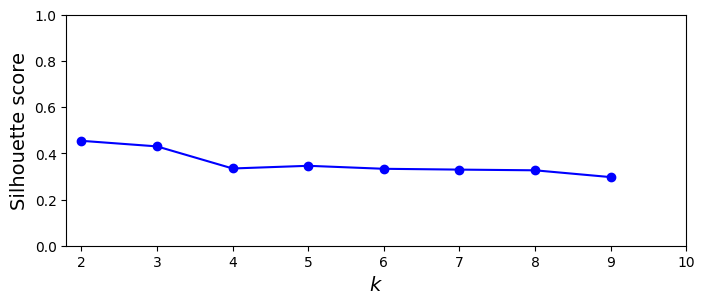

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, init="random", n_init=10, algorithm="full", random_state=11).fit(sample_X)
                for k in range(1, 10)] #se crea una lista de modelos k-means, uno por cada numero de clusters (1-10)

# Calcular los puntajes de silueta en la muestra de X
silhouette_scores = [silhouette_score(sample_X, model.labels_)
                     for model in kmeans_per_k[1:]]  # Se calculan los puntajes de silueta para todos los modelos
# Graficar los puntajes de silueta
plt.figure(figsize=(8, 3))  # Se crea una figura de 8x3 pulgadas
plt.plot(range(2, 10), silhouette_scores, "bo-")  # Se grafican los puntajes de silueta con puntos azules
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.0, 0.0, 1])  # Se establece el rango para el eje x y el eje y
plt.show()

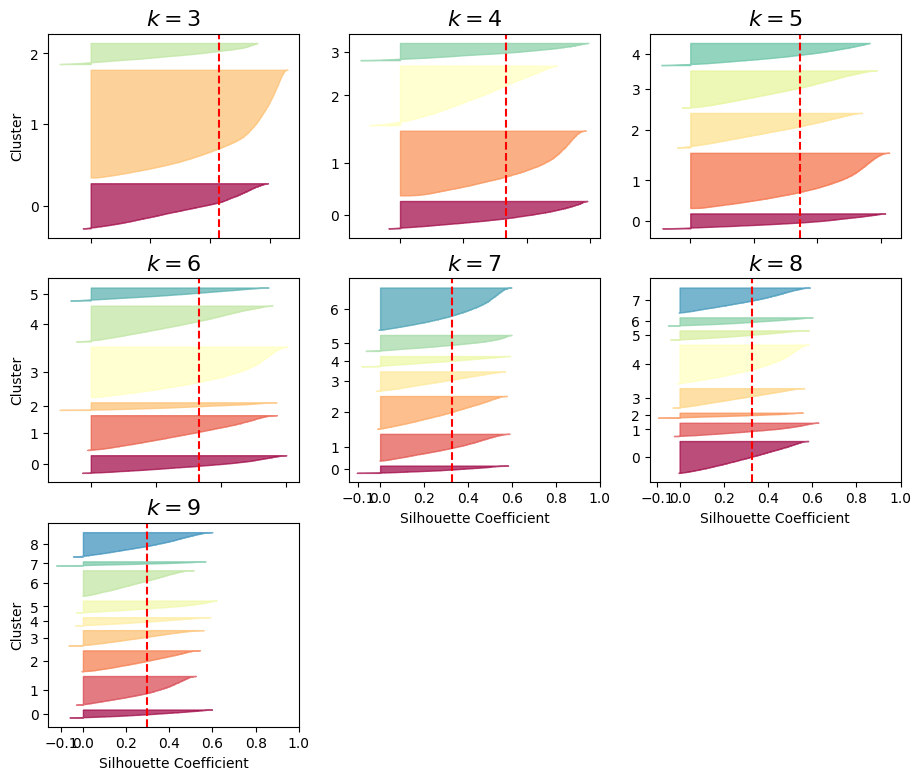

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Crear una figura de 11x9 pulgadas
plt.figure(figsize=(11, 9))

n_rows = 3  # número de filas en la cuadrícula de subgráficos
n_cols = 3  # número de columnas en la cuadrícula de subgráficos

for k in range(3, 10):  # se itera por los valores de k (numero de clusters)
    index = k - 3  # calcula el índice correcto para el subgráfico
    plt.subplot(n_rows, n_cols, index + 1)  # crea un subgrafico para cada uno

    y_pred = kmeans_per_k[k - 1].labels_  # se obtienen las etiquetas
    silhouette_coefficients = silhouette_samples(sample_X, y_pred)  # se calculan los coeficientes de las siluetas para cada muestra

    padding = len(sample_X) // 30  # se establece un espacio entre los graficos de silueta de cada cluster
    pos = padding
    ticks = []  # cada tick representara el centro de un cluster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]  # se seleccionan los coeficientes correspondiente al cluster i
        coeffs.sort()  # se ordenan los coeficientes

        color = mpl.cm.Spectral(i / k)  # se asigna un color a cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)  # se crea un grafico para los coeficientes
        ticks.append(pos + len(coeffs) // 2)  # se adiciona la posicion del centro del area de silueta
        pos += len(coeffs) + padding  # se actualiza la posicion para el siguiente cluster

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")  # se dibuja una linea con el valor medio del coeficiente de silueta
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Conseguimos los clusters graficados y vemos los cercanos al coheficiente de silueta, en este caso los cercanos son 7,8,9, sin embargo el 7 tiene la grafica mas regular

**Aprendizaje Semisupervisado**

In [ ]:
from sklearn.cluster import KMeans

k = 7 #establece el numero de clusters
kmeans = KMeans(n_clusters=k, random_state=42) #incializa el modelo
X_digits_dist = kmeans.fit_transform(X_train)#calcula las distancias de los datos a todos los centroides

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
idxs = np.argmin(X_digits_dist, axis=0)#calcula los indices de las distancias minimas para cada columna
X_representative_digits = X_train.values[idxs]#devuleve las muestras mas representativas por cada columna

In [ ]:
#Como el cuadernillo de SensIO hacemos trampa asignando los labels que ya conocemos
y_representative_digits = y_train.values[idxs]#identifica los labels correspondientes a las muestras mas representativas

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea un modelo de regresion logistica con one vs all
%time log_reg2.fit(X_representative_digits, y_representative_digits)#entrena un modelo con los datos y labels representativos
log_reg2.score(X_test, y_test)#muestra la presicion del modelo

CPU times: user 13.6 ms, sys: 813 µs, total: 14.4 ms
Wall time: 15.9 ms


0.4470710738965431

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea otro modelo de regresion logistica con one vs all
%time log_reg.fit(X_train, y_train)#entrena el modelo con 50 datos y labels correspondientes
log_reg.score(X_test, y_test)

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea otro modelo de regresion logistica con one vs all
%time log_reg.fit(X_train, y_train)#entrena el modelo con 50 datos y labels correspondientes
log_reg.score(X_test, y_test)

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]#se asigna la etiqueta representativa a todas las muestras que pertenecen al cluster i

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea el tercer modelo de regresion logistica con one vs all
%time log_reg3.fit(X_train, y_train_propagated)#entrena el modelo con 1000 datos de entrenamiento y sus Y's correspondientes pero ya modifcadas en base a las y representativas
log_reg3.score(X_test, y_test)#calcula la presicion del modelo

CPU times: user 43.6 s, sys: 8.67 s, total: 52.3 s
Wall time: 32 s


0.46275913702744337

**Aprendizaje Activo**

In [ ]:
probas = log_reg3.predict_proba(X_train[:1000])#se obtienen las probabilidades de que las primeras 1000 muestras pertenezcan a cada clase posible
labels_ixs = np.argmax(probas, axis=1)#obtiene el indice de la probabilidad maxima (la clase mas probable) por cada muestra
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])#se obtiene la probabilidad maxima de cada muestra
sorted_ixs = np.argsort(labels) #se ordenan los indices de las muestras por sus probabilidades en orden ascendente(las primeras seran las entradas con menores probabilidades maximas)
labels[sorted_ixs[:10]]#se muestran las 10 muestras con las menores probabilidades maximas

array([0.51393807, 0.51446577, 0.52154967, 0.52567941, 0.52728085,
       0.52808539, 0.53359542, 0.53711023, 0.53847721, 0.54214854])

In [ ]:
y_lowest = y_train.values[:1000][sorted_ixs[:k]] #obtiene las etiquetas de las k muestras con las menores probabilidades maximas de ser clasificadas correctamente
y_lowest

array([2, 1, 2, 2, 1, 1, 7])

In [ ]:
y_train2 = y_train_propagated.copy()#copia las 1000 primeras filas de las y propagadas
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train, y_train2)
log_reg5.score(X_test, y_test)

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train, y_train2)
log_reg5.score(X_test, y_test)